# Fasos-SQL-Project (Part-1)

In [ ]:
#database for Fasos sql
drop table if exists driver;
CREATE TABLE driver(driver_id integer,reg_date date); 

INSERT INTO driver(driver_id,reg_date) 
 VALUES (1,'01-01-2021'),
(2,'01-03-2021'),
(3,'01-08-2021'),
(4,'01-15-2021');


drop table if exists ingredients;
CREATE TABLE ingredients(ingredients_id integer,ingredients_name varchar(60)); 

INSERT INTO ingredients(ingredients_id ,ingredients_name) 
 VALUES (1,'BBQ Chicken'),
(2,'Chilli Sauce'),
(3,'Chicken'),
(4,'Cheese'),
(5,'Kebab'),
(6,'Mushrooms'),
(7,'Onions'),
(8,'Egg'),
(9,'Peppers'),
(10,'schezwan sauce'),
(11,'Tomatoes'),
(12,'Tomato Sauce');

drop table if exists rolls;
CREATE TABLE rolls(roll_id integer,roll_name varchar(30)); 

INSERT INTO rolls(roll_id ,roll_name) 
 VALUES (1	,'Non Veg Roll'),
(2	,'Veg Roll');

drop table if exists rolls_recipes;
CREATE TABLE rolls_recipes(roll_id integer,ingredients varchar(24)); 

INSERT INTO rolls_recipes(roll_id ,ingredients) 
 VALUES (1,'1,2,3,4,5,6,8,10'),
(2,'4,6,7,9,11,12');

drop table if exists driver_order;
CREATE TABLE driver_order(order_id integer,driver_id integer,pickup_time datetime,distance VARCHAR(7),duration VARCHAR(10),cancellation VARCHAR(23));
INSERT INTO driver_order(order_id,driver_id,pickup_time,distance,duration,cancellation) 
 VALUES(1,1,'01-01-2021 18:15:34','20km','32 minutes',''),
(2,1,'01-01-2021 19:10:54','20km','27 minutes',''),
(3,1,'01-03-2021 00:12:37','13.4km','20 mins','NaN'),
(4,2,'01-04-2021 13:53:03','23.4','40','NaN'),
(5,3,'01-08-2021 21:10:57','10','15','NaN'),
(6,3,null,null,null,'Cancellation'),
(7,2,'01-08-2020 21:30:45','25km','25mins',null),
(8,2,'01-10-2020 00:15:02','23.4 km','15 minute',null),
(9,2,null,null,null,'Customer Cancellation'),
(10,1,'01-11-2020 18:50:20','10km','10minutes',null);


drop table if exists customer_orders;
CREATE TABLE customer_orders(order_id integer,customer_id integer,roll_id integer,not_include_items VARCHAR(4),extra_items_included VARCHAR(4),order_date datetime);
INSERT INTO customer_orders(order_id,customer_id,roll_id,not_include_items,extra_items_included,order_date)
values (1,101,1,'','','01-01-2021  18:05:02'),
(2,101,1,'','','01-01-2021 19:00:52'),
(3,102,1,'','','01-02-2021 23:51:23'),
(3,102,2,'','NaN','01-02-2021 23:51:23'),
(4,103,1,'4','','01-04-2021 13:23:46'),
(4,103,1,'4','','01-04-2021 13:23:46'),
(4,103,2,'4','','01-04-2021 13:23:46'),
(5,104,1,null,'1','01-08-2021 21:00:29'),
(6,101,2,null,null,'01-08-2021 21:03:13'),
(7,105,2,null,'1','01-08-2021 21:20:29'),
(8,102,1,null,null,'01-09-2021 23:54:33'),
(9,103,1,'4','1,5','01-10-2021 11:22:59'),
(10,104,1,null,null,'01-11-2021 18:34:49'),
(10,104,1,'2,6','1,4','01-11-2021 18:34:49');

select * from customer_orders;
select * from driver_order;
select * from ingredients;
select * from driver;
select * from rolls;
select * from rolls_recipes;

# Questions Below

## A. Roll Metrics

## 1. How Many rolls were ordered ?

## A: SELECT COUNT(roll_id) FROM customer_orders;
## 14 rolls

## 2. How many unique customer orders were made ?

## A: SELECT COUNT(DISTINCT customer_id) FROM customer_orders;
## 5 unique Customer orders

## 3. How Many Succesful orders were delivered by each driver ?

## A: SELECT driver_id, COUNT(DISTINCT order_id) FROM driver_order 
## WHERE cancellation NOT IN ('Cancellation','Customer Cancellation')
## GROUP BY driver_id;
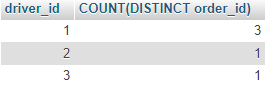

## 4. How Many veg & non veg rolls were ordered by each customer ?

## A: SELECT a.*,b.roll_name FROM
## (
    SELECT customer_id,roll_id,COUNT(roll_id) cnt
    FROM customer_orders
    GROUP BY customer_id,roll_id
## )
## a INNER JOIN rolls b ON a.roll_id=b.roll_id;

![image.png](attachment:image.png)

## 5. How many of each type of roll was delivered ?

## A: Using case function in SQL(https://www.w3schools.com/sql/sql_case.asp)

## Step1:
## SELECT *, CASE WHEN cancellation IN ('Cancellation','Customer Cancellation') THEN 'c' ELSE 'nc' END AS order_cancel_details FROM driver_order;

as you can see in the below image 2 orders were cancelled & rest of were not cancelled, we want to see those order which were not cancelled

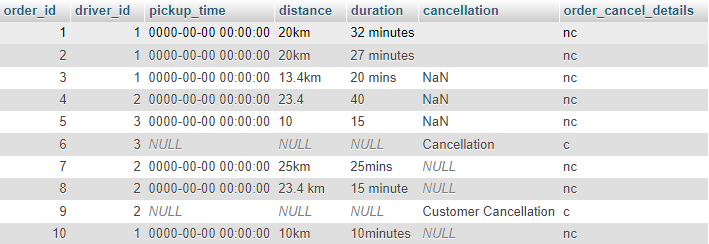

## Step2:
## SELECT * FROM
## (SELECT *, CASE WHEN cancellation IN ('Cancellation','Customer Cancellation') THEN 'c' ELSE 'nc' END AS order_cancel_details FROM driver_order)a
## WHERE order_cancel_details='nc';

we only get those data for the orders which are not cancelled, they were sucessfully delivered

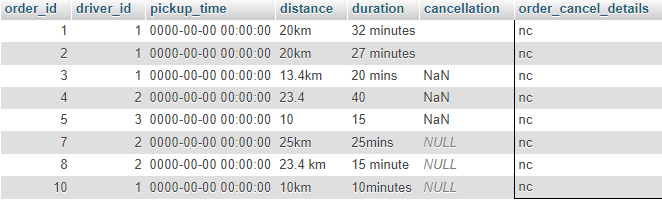

## Step3: (Here we need to find which role had been delivered ?)
## SELECT roll_id,COUNT(roll_id) FROM customer_orders WHERE order_id IN(
## SELECT order_id FROM 
## (SELECT *, CASE WHEN cancellation IN ('Cancellation','Customer Cancellation') THEN 'c' ELSE 'nc' END AS order_cancel_details FROM driver_order)a 
## WHERE order_cancel_details='nc')
## GROUP BY roll_id;

using this query we get to know all the types of rolls based on their id delivered
As we can see below images roll_id 1 was deliverd 9 times & roll_id 2 has delivered 3 times

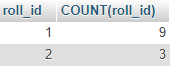


## 6. What was the maximum number of rolls delivered in a single order ?

In [2]:
#we are only concered with the the total number of delivered rolls, not the type of roll

### 1) SELECT * FROM customer_orders;

### 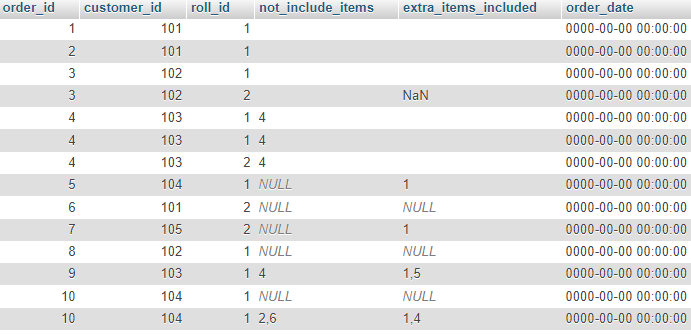

In [3]:
#as you can see that for same customer id we have 2 rolls, which means one person had ordered more than one role,
#which also we need to take into consideration,as we need to count total number of rolls delivered

### SELECT * FROM driver_order;

### 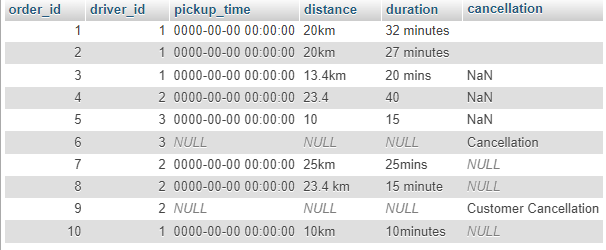

In [4]:
#also we need to remove all such orders which were either cancelled by the drivers or the customers

### SELECT * FROM customer_orders WHERE order_id in ( SELECT order_id FROM (SELECT *, CASE WHEN cancellation IN ('Cancellation','Customer Cancellation') THEN 'c' ELSE 'nc' END AS order_cancel_details FROM driver_order)a WHERE order_cancel_details='nc');

### 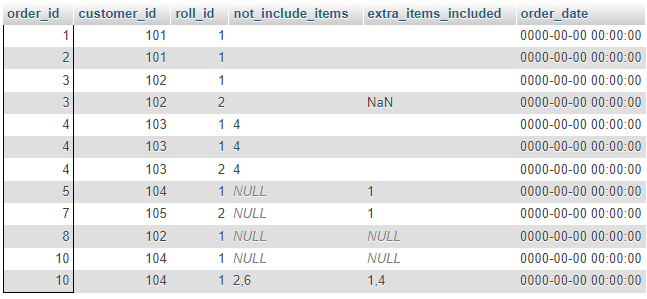

In [6]:
#from this we get to know about the rolls which is being delievrd succesfully, now we want to count rolls for single order

### SELECT order_id,COUNT(roll_id) FROM(SELECT * FROM customer_orders WHERE order_id in ( SELECT order_id FROM (SELECT *, CASE WHEN cancellation IN ('Cancellation','Customer Cancellation') THEN 'c' ELSE 'nc' END AS order_cancel_details FROM driver_order)a WHERE order_cancel_details='nc'))b 
### GROUP BY order_id;

### 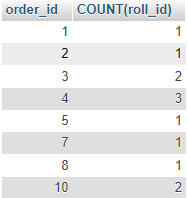

In [7]:
#as we can see that order_id has maximum rolls ordered

# Fasos-SQL-Project (Part-2)

## 7. For each customer, how many delivered rolls had at least 1 change and how many had no changes ?

In [11]:
#for changes we will consider columns like not_include_items & extra_items_included
#also we need to do some data cleaning also like removing null & nan values & so on...
#we need to substitute the empty, nan & null values with 0 by creating a temprory table to do later queries

In [13]:
# we are using with function to create temprory table
# https://www.geeksforgeeks.org/sql-with-clause/ (read here about with function)

### 
WITH temp_customer_orders(order_id,customer_id,roll_id,not_include_items,extra_items_included,order_date) as 
( SELECT order_id,customer_id,roll_id, 
 CASE WHEN not_include_items IS null OR not_include_items='' THEN 0 ELSE not_include_items end as new_not_include_items, 
 CASE WHEN extra_items_included IS null OR extra_items_included=''or extra_items_included='NaN' THEN 0 ELSE extra_items_included end as new_extra_items_included, 
 order_date FROM customer_orders ) 
 SELECT * FROM temp_customer_orders;

### 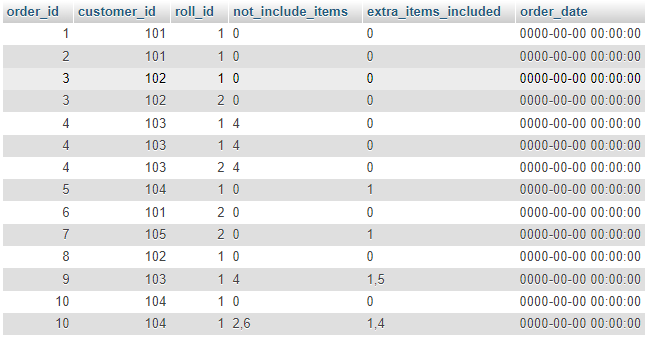

In [15]:
#also we are making some changes in driver order table to remove null values
# for now we are making changes in cancellation column of driver table

### 
WITH temp_driver_order(order_id,driver_id,pickup_time,distance,duration,cancellation) as 
( SELECT order_id,driver_id,pickup_time,distance,duration, 
CASE WHEN cancellation in ('Cancellation','Customer Cancellation') THEN 0 ELSE 1 end AS new_cancellation 
FROM driver_order ) 
SELECT * FROM temp_driver_order;

In [16]:
# as you can see that the order which is cancelled are marked as 0 & all the others are marked as 1

### 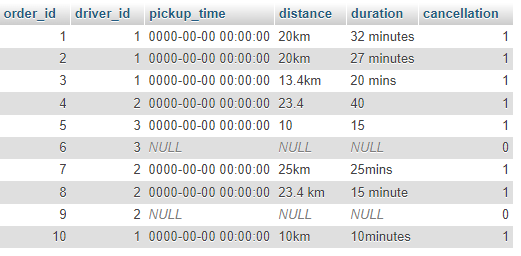

In [17]:
# now move on to our real question

In [18]:
#first of all we are finding the sucesuflly delivered orders

### 
WITH temp_driver_order(order_id,driver_id,pickup_time,distance,duration,new_cancellation) as ( SELECT order_id,driver_id,pickup_time,distance,duration, CASE WHEN cancellation in ('Cancellation','Customer Cancellation') THEN 0 ELSE 1 end AS new_cancellation FROM driver_order ) 

SELECT * FROM temp_driver_order WHERE new_cancellation!=0;

### 
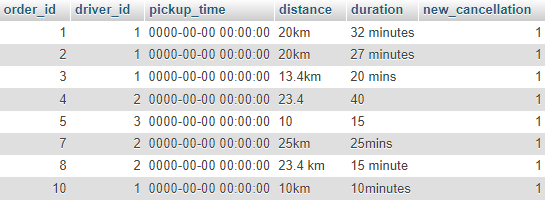

In [19]:
#now move on to further step, how many delivered rolls had at least 1 change

### 
WITH temp_customer_orders(order_id,customer_id,roll_id,not_include_items,extra_items_included,order_date) as ( SELECT order_id,customer_id,roll_id, CASE WHEN not_include_items IS null OR not_include_items='' THEN 0 ELSE not_include_items end as new_not_include_items, CASE WHEN extra_items_included IS null OR extra_items_included=''or extra_items_included='NaN' THEN 0 ELSE extra_items_included end as new_extra_items_included, order_date FROM customer_orders ),

temp_driver_order(order_id,driver_id,pickup_time,distance,duration,new_cancellation) as ( SELECT order_id,driver_id,pickup_time,distance,duration, CASE WHEN cancellation in ('Cancellation','Customer Cancellation') THEN 0 ELSE 1 end AS new_cancellation FROM driver_order )

SELECT *,CASE WHEN not_include_items=0 AND extra_items_included=0 THEN 'no change' ELSE 'change' END chg_no_chg FROM temp_customer_orders WHERE order_id in(
SELECT order_id FROM temp_driver_order WHERE new_cancellation!=0);

### 
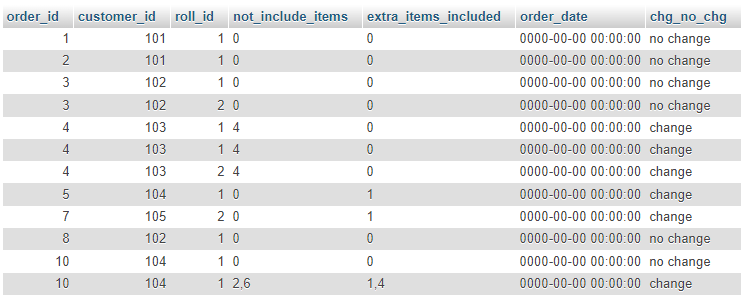

In [21]:
# as we can see a new column of showing change, now we just need to count the column which had value change

### 
WITH temp_customer_orders(order_id,customer_id,roll_id,not_include_items,extra_items_included,order_date) as ( SELECT order_id,customer_id,roll_id, CASE WHEN not_include_items IS null OR not_include_items='' THEN 0 ELSE not_include_items end as new_not_include_items, CASE WHEN extra_items_included IS null OR extra_items_included=''or extra_items_included='NaN' THEN 0 ELSE extra_items_included end as new_extra_items_included, order_date FROM customer_orders ),

temp_driver_order(order_id,driver_id,pickup_time,distance,duration,new_cancellation) as ( SELECT order_id,driver_id,pickup_time,distance,duration, CASE WHEN cancellation in ('Cancellation','Customer Cancellation') THEN 0 ELSE 1 end AS new_cancellation FROM driver_order )

SELECT customer_id, chg_no_chg,count(order_id) FROM(
SELECT *,CASE WHEN not_include_items=0 AND extra_items_included=0 THEN 'no change' ELSE 'change' END chg_no_chg FROM temp_customer_orders WHERE order_id in( SELECT order_id FROM temp_driver_order WHERE new_cancellation!=0))a
GROUP BY customer_id, chg_no_chg;

### 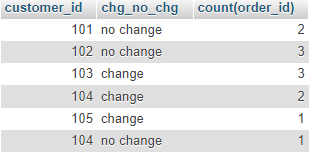

## 8. How many rolls were delivered that had both exculsions & extras ?

In [1]:
#as the question is somewhat similar to above question, we are using the same query, just making some changes at the ending part

### 
WITH temp_customer_orders(order_id,customer_id,roll_id,not_include_items,extra_items_included,order_date) as ( SELECT order_id,customer_id,roll_id, CASE WHEN not_include_items IS null OR not_include_items='' THEN 0 ELSE not_include_items end as new_not_include_items, CASE WHEN extra_items_included IS null OR extra_items_included=''or extra_items_included='NaN' THEN 0 ELSE extra_items_included end as new_extra_items_included, order_date FROM customer_orders ),

temp_driver_order(order_id,driver_id,pickup_time,distance,duration,new_cancellation) as ( SELECT order_id,driver_id,pickup_time,distance,duration, CASE WHEN cancellation in ('Cancellation','Customer Cancellation') THEN 0 ELSE 1 end AS new_cancellation FROM driver_order )

 SELECT *,CASE WHEN not_include_items!=0 AND extra_items_included!=0 THEN 'both incl & excl' ELSE 'at least one of them incl or excl' END chg_no_chg FROM temp_customer_orders WHERE order_id in( SELECT order_id FROM temp_driver_order WHERE new_cancellation!=0);

In [2]:
#as you can see in the below image that, in this data only one data is there in which both the condition are being fullfilled

### 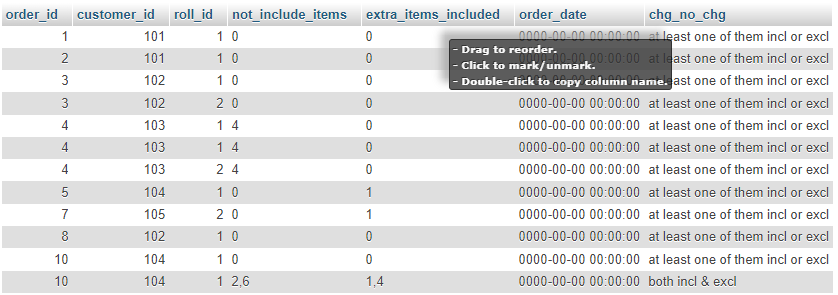

In [4]:
#now we just need to count the total number of data as shown below

### 
WITH temp_customer_orders(order_id,customer_id,roll_id,not_include_items,extra_items_included,order_date) as ( SELECT order_id,customer_id,roll_id, CASE WHEN not_include_items IS null OR not_include_items='' THEN 0 ELSE not_include_items end as new_not_include_items, CASE WHEN extra_items_included IS null OR extra_items_included=''or extra_items_included='NaN' THEN 0 ELSE extra_items_included end as new_extra_items_included, order_date FROM customer_orders ),

temp_driver_order(order_id,driver_id,pickup_time,distance,duration,new_cancellation) as ( SELECT order_id,driver_id,pickup_time,distance,duration, CASE WHEN cancellation in ('Cancellation','Customer Cancellation') THEN 0 ELSE 1 end AS new_cancellation FROM driver_order )

SELECT chg_no_chg,COUNT(chg_no_chg) FROM
(SELECT *,CASE WHEN not_include_items!=0 AND extra_items_included!=0 THEN 'both incl & excl' ELSE 'at least one of them incl or excl' END chg_no_chg FROM temp_customer_orders WHERE order_id in( SELECT order_id FROM temp_driver_order WHERE new_cancellation!=0))a
GROUP BY chg_no_chg;

### 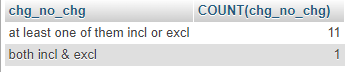